In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns

### Import Data Set

In [2]:
df = pd.read_csv('footwear.csv')

In [29]:
df = pd.get_dummies(df, columns=['Color'], prefix=["Color"] )
df = pd.get_dummies(df, columns=['Gender'], prefix=["Gender"] )

In [30]:
df.head()

,Unnamed: 0,Fiscal_Year,Fiscal_Week,Product_Division,Article,Style_Desc,Season_Opened,UPC,US_Size,On_Hand_Qty,...,Color_silver,Color_translucent,Color_white,Color_yellow,Gender_INF,Gender_JNR,Gender_MNS,Gender_PSC,Gender_UNI,Gender_WNS
0,8,2022,15,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,9,2020,20,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,10,2020,23,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,11,2020,22,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,12,2020,49,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1


### Drop Columns

In [32]:
df.drop(['Color_Assorted Colours', 'Color_beige', 'Color_brown', 'Color_gold', 'Color_green', 'Color_metallic', 'Color_not defined', 'Color_orange',
       'Color_pink', 'Color_purple', 'Color_silver',
       'Color_translucent', 'Color_yellow', 'Gender_INF',
       'Gender_JNR', 'Gender_MNS', 'Gender_PSC', 'Gender_UNI', 'Gender_WNS'], axis=1, inplace=True)

In [33]:
df.head()

,Unnamed: 0,Fiscal_Year,Fiscal_Week,Product_Division,Article,Style_Desc,Season_Opened,UPC,US_Size,On_Hand_Qty,...,Shipped_Qty,Shipped_Value,Total_Demand_Qty,Total_Demand_Value,Price,Color_black,Color_blue,Color_gray,Color_red,Color_white
0,8,2022,15,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,1.0,...,0.0,0.0,1.0,16.5,16.5,1,0,0,0,0
1,9,2020,20,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,0.0,31.0,511.5,16.5,1,0,0,0,0
2,10,2020,23,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,0.0,1.0,16.5,16.5,1,0,0,0,0
3,11,2020,22,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,0.0,2.0,33.0,16.5,1,0,0,0,0
4,12,2020,49,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,0.0,94.0,1551.0,16.5,1,0,0,0,0


### Add Fiscal Weeks

In [43]:
df['FiscalWeekKey'] = df.Fiscal_Year.astype(str) + df.Fiscal_Week.astype(str)
df

,Unnamed: 0,Fiscal_Year,Fiscal_Week,Product_Division,Article,Style_Desc,Season_Opened,UPC,US_Size,On_Hand_Qty,...,Shipped_Value,Total_Demand_Qty,Total_Demand_Value,Price,Color_black,Color_blue,Color_gray,Color_red,Color_white,FiscalWeekKey
0,8,2022,15,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,1.0,...,0.0,1.0,16.5,16.50,1,0,0,0,0,202215
1,9,2020,20,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,31.0,511.5,16.50,1,0,0,0,0,202020
2,10,2020,23,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,1.0,16.5,16.50,1,0,0,0,0,202023
3,11,2020,22,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,2.0,33.0,16.50,1,0,0,0,0,202022
4,12,2020,49,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,0.0,...,0.0,94.0,1551.0,16.50,1,0,0,0,0,202049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452528,2064347,2021,16,Footwear,37499206,RS 2.0 CORE,20211,194578665959,5.0,0.0,...,44.0,1.0,44.0,44.00,0,0,0,0,1,202116
1452529,2064348,2021,18,Footwear,37401114,RS 2.0 FUTURA,20211,194578742490,6.0,0.0,...,44.0,1.0,44.0,44.00,0,0,0,0,1,202118
1452530,2064349,2021,22,Footwear,37401114,RS 2.0 FUTURA,20211,194578742490,6.0,0.0,...,44.0,1.0,44.0,44.00,0,0,0,0,1,202122
1452531,2064350,2021,14,Footwear,38146001,RS 2.0 CS,20211,194579235427,4.5,0.0,...,44.0,1.0,44.0,44.00,0,1,0,0,0,202114


In [44]:
df['FiscalWeekKey'] = df.FiscalWeekKey.astype(int)
df.dtypes

Unnamed: 0              int64
Fiscal_Year             int64
Fiscal_Week             int64
Product_Division       object
Article                 int64
Style_Desc             object
Season_Opened           int64
UPC                     int64
US_Size               float64
On_Hand_Qty           float64
On_Hand_Value         float64
Cancelled_Qty         float64
Cancelled_Value       float64
Shipped_Qty           float64
Shipped_Value         float64
Total_Demand_Qty      float64
Total_Demand_Value    float64
Price                 float64
Color_black             uint8
Color_blue              uint8
Color_gray              uint8
Color_red               uint8
Color_white             uint8
FiscalWeekKey           int64
dtype: object

In [45]:
df1 = pd.read_csv('newDate.csv')
df1

,TheDate,FiscalYear,FiscalQtr,FiscalQtrKey,FiscalQtrName,FiscalMonth,FiscalMonthKey,FiscalMonthName,FiscalMonthLabel,FiscalWeekKey,FiscalWeek,FiscalWeekName
0,1/1/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20191,1,2019 Week 1
1,1/7/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20192,2,2019 Week 2
2,1/14/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20193,3,2019 Week 3
3,1/21/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20194,4,2019 Week 4
4,1/28/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20195,5,2019 Week 5
...,...,...,...,...,...,...,...,...,...,...,...,...
207,11/28/2022 0:00,2022,4,20224,2022 Q4,11,202211,Nov-22,Nov,202249,49,2022 Week 49
208,12/5/2022 0:00,2022,4,20224,2022 Q4,12,202212,Dec-22,Dec,202250,50,2022 Week 50
209,12/12/2022 0:00,2022,4,20224,2022 Q4,12,202212,Dec-22,Dec,202251,51,2022 Week 51
210,12/19/2022 0:00,2022,4,20224,2022 Q4,12,202212,Dec-22,Dec,202252,52,2022 Week 52


In [46]:
df1

,TheDate,FiscalYear,FiscalQtr,FiscalQtrKey,FiscalQtrName,FiscalMonth,FiscalMonthKey,FiscalMonthName,FiscalMonthLabel,FiscalWeekKey,FiscalWeek,FiscalWeekName
0,1/1/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20191,1,2019 Week 1
1,1/7/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20192,2,2019 Week 2
2,1/14/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20193,3,2019 Week 3
3,1/21/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20194,4,2019 Week 4
4,1/28/2019 0:00,2019,1,20191,2019 Q1,1,20191,Jan-19,Jan,20195,5,2019 Week 5
...,...,...,...,...,...,...,...,...,...,...,...,...
207,11/28/2022 0:00,2022,4,20224,2022 Q4,11,202211,Nov-22,Nov,202249,49,2022 Week 49
208,12/5/2022 0:00,2022,4,20224,2022 Q4,12,202212,Dec-22,Dec,202250,50,2022 Week 50
209,12/12/2022 0:00,2022,4,20224,2022 Q4,12,202212,Dec-22,Dec,202251,51,2022 Week 51
210,12/19/2022 0:00,2022,4,20224,2022 Q4,12,202212,Dec-22,Dec,202252,52,2022 Week 52


### Merge Date and Footwear Dataset

In [47]:
new = pd.merge(df, df1, how='inner')
pd.set_option("display.max_columns", None)
new

,Unnamed: 0,Fiscal_Year,Fiscal_Week,Product_Division,Article,Style_Desc,Season_Opened,UPC,US_Size,On_Hand_Qty,On_Hand_Value,Cancelled_Qty,Cancelled_Value,Shipped_Qty,Shipped_Value,Total_Demand_Qty,Total_Demand_Value,Price,Color_black,Color_blue,Color_gray,Color_red,Color_white,FiscalWeekKey,TheDate,FiscalYear,FiscalQtr,FiscalQtrKey,FiscalQtrName,FiscalMonth,FiscalMonthKey,FiscalMonthName,FiscalMonthLabel,FiscalWeek,FiscalWeekName
0,8,2022,15,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,1.0,16.50,0.0,0.0,0.0,0.0,1.0,16.50,16.50,1,0,0,0,0,202215,4/4/2022 0:00,2022,2,20222,2022 Q2,4,20224,Apr-22,Apr,15,2022 Week 15
1,67,2022,15,Footwear,37032502,CARINA L,20191,192340682746,9.5,1.0,35.75,0.0,0.0,0.0,0.0,1.0,35.75,35.75,0,0,0,0,1,202215,4/4/2022 0:00,2022,2,20222,2022 Q2,4,20224,Apr-22,Apr,15,2022 Week 15
2,696,2022,15,Footwear,19307801,PROWL SLIP ON WNS,20201,193525446559,9.5,19.0,679.25,0.0,0.0,0.0,0.0,19.0,679.25,35.75,1,0,0,0,0,202215,4/4/2022 0:00,2022,2,20222,2022 Q2,4,20224,Apr-22,Apr,15,2022 Week 15
3,744,2022,15,Footwear,19438401,AXELION LS,20211,194578912541,9.5,17.0,701.25,0.0,0.0,0.0,0.0,17.0,701.25,41.25,1,0,0,0,0,202215,4/4/2022 0:00,2022,2,20222,2022 Q2,4,20224,Apr-22,Apr,15,2022 Week 15
4,767,2022,15,Footwear,19438401,AXELION LS,20211,194578912602,13.0,22.0,907.50,0.0,0.0,0.0,0.0,22.0,907.50,41.25,1,0,0,0,0,202215,4/4/2022 0:00,2022,2,20222,2022 Q2,4,20224,Apr-22,Apr,15,2022 Week 15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452528,1310932,2020,12,Footwear,37201702,POPCAT 20 JR,20201,193525628689,4.0,0.0,0.00,0.0,0.0,1.0,10.0,1.0,10.00,10.00,0,0,0,0,1,202012,3/16/2020 0:00,2020,1,20201,2020 Q1,3,20203,Mar-20,Mar,12,2020 Week 12
1452529,1310962,2020,12,Footwear,37201704,POPCAT 20 JR,20201,193525638022,6.0,0.0,0.00,0.0,0.0,3.0,30.0,3.0,30.00,10.00,0,0,0,1,0,202012,3/16/2020 0:00,2020,1,20201,2020 Q1,3,20203,Mar-20,Mar,12,2020 Week 12
1452530,1315606,2020,12,Footwear,37234201,SEGA Leadcat FTR SONIC Jr,20201,193525496691,7.0,0.0,0.00,0.0,0.0,8.0,120.0,8.0,120.00,15.00,0,1,0,0,0,202012,3/16/2020 0:00,2020,1,20201,2020 Q1,3,20203,Mar-20,Mar,12,2020 Week 12
1452531,1455855,2020,12,Footwear,37198301,RS-X SOFT CASE WN'S,20193,193524255282,8.0,0.0,0.00,0.0,0.0,1.0,60.5,1.0,60.50,60.50,0,0,0,0,0,202012,3/16/2020 0:00,2020,1,20201,2020 Q1,3,20203,Mar-20,Mar,12,2020 Week 12


In [48]:
new.drop(['FiscalYear', 'FiscalQtr',
       'FiscalQtrKey', 'FiscalQtrName',
       'FiscalMonth',
       'FiscalMonthKey', 'FiscalMonthName',
       'FiscalMonthLabel', 'FiscalWeek', 'FiscalWeekName', 'Unnamed: 0'], axis=1, inplace=True)

In [49]:
new.head()

,Fiscal_Year,Fiscal_Week,Product_Division,Article,Style_Desc,Season_Opened,UPC,US_Size,On_Hand_Qty,On_Hand_Value,Cancelled_Qty,Cancelled_Value,Shipped_Qty,Shipped_Value,Total_Demand_Qty,Total_Demand_Value,Price,Color_black,Color_blue,Color_gray,Color_red,Color_white,FiscalWeekKey,TheDate
0,2022,15,Footwear,37101305,Cool Cat Wns,20191,192340698204,7.0,1.0,16.50,0.0,0.0,0.0,0.0,1.0,16.50,16.50,1,0,0,0,0,202215,4/4/2022 0:00
1,2022,15,Footwear,37032502,CARINA L,20191,192340682746,9.5,1.0,35.75,0.0,0.0,0.0,0.0,1.0,35.75,35.75,0,0,0,0,1,202215,4/4/2022 0:00
2,2022,15,Footwear,19307801,PROWL SLIP ON WNS,20201,193525446559,9.5,19.0,679.25,0.0,0.0,0.0,0.0,19.0,679.25,35.75,1,0,0,0,0,202215,4/4/2022 0:00
3,2022,15,Footwear,19438401,AXELION LS,20211,194578912541,9.5,17.0,701.25,0.0,0.0,0.0,0.0,17.0,701.25,41.25,1,0,0,0,0,202215,4/4/2022 0:00
4,2022,15,Footwear,19438401,AXELION LS,20211,194578912602,13.0,22.0,907.50,0.0,0.0,0.0,0.0,22.0,907.50,41.25,1,0,0,0,0,202215,4/4/2022 0:00


In [50]:
new.columns

Index(['Fiscal_Year', 'Fiscal_Week', 'Product_Division', 'Article',
       'Style_Desc', 'Season_Opened', 'UPC', 'US_Size', 'On_Hand_Qty',
       'On_Hand_Value', 'Cancelled_Qty', 'Cancelled_Value', 'Shipped_Qty',
       'Shipped_Value', 'Total_Demand_Qty', 'Total_Demand_Value', 'Price',
       'Color_black', 'Color_blue', 'Color_gray', 'Color_red', 'Color_white',
       'FiscalWeekKey', 'TheDate'],
      dtype='object')

In [51]:
new.dtypes

Fiscal_Year             int64
Fiscal_Week             int64
Product_Division       object
Article                 int64
Style_Desc             object
Season_Opened           int64
UPC                     int64
US_Size               float64
On_Hand_Qty           float64
On_Hand_Value         float64
Cancelled_Qty         float64
Cancelled_Value       float64
Shipped_Qty           float64
Shipped_Value         float64
Total_Demand_Qty      float64
Total_Demand_Value    float64
Price                 float64
Color_black             uint8
Color_blue              uint8
Color_gray              uint8
Color_red               uint8
Color_white             uint8
FiscalWeekKey           int64
TheDate                object
dtype: object

In [52]:
new['TheDate']= pd.to_datetime(new['TheDate'])

In [53]:
new.dtypes

Fiscal_Year                    int64
Fiscal_Week                    int64
Product_Division              object
Article                        int64
Style_Desc                    object
Season_Opened                  int64
UPC                            int64
US_Size                      float64
On_Hand_Qty                  float64
On_Hand_Value                float64
Cancelled_Qty                float64
Cancelled_Value              float64
Shipped_Qty                  float64
Shipped_Value                float64
Total_Demand_Qty             float64
Total_Demand_Value           float64
Price                        float64
Color_black                    uint8
Color_blue                     uint8
Color_gray                     uint8
Color_red                      uint8
Color_white                    uint8
FiscalWeekKey                  int64
TheDate               datetime64[ns]
dtype: object

In [83]:
filt = new[new.UPC == 193524389956] 

In [84]:
#filt = filt2[filt2.Total_Demand_Qty < 20]

In [85]:
filt.shape

(46, 24)

In [86]:
filt.head()

,Fiscal_Year,Fiscal_Week,Product_Division,Article,Style_Desc,Season_Opened,UPC,US_Size,On_Hand_Qty,On_Hand_Value,Cancelled_Qty,Cancelled_Value,Shipped_Qty,Shipped_Value,Total_Demand_Qty,Total_Demand_Value,Price,Color_black,Color_blue,Color_gray,Color_red,Color_white,FiscalWeekKey,TheDate
19925,2020,23,Footwear,19117501,TAZON 6 WIDE FRACTURE FM,20193,193524389956,10.0,0.0,0.0,0.0,0.0,3.0,115.5,3.0,115.5,38.5,1,0,0,0,0,202023,2020-06-01
68172,2020,49,Footwear,19117501,TAZON 6 WIDE FRACTURE FM,20193,193524389956,10.0,0.0,0.0,54.0,2079.0,0.0,0.0,54.0,2079.0,38.5,1,0,0,0,0,202049,2020-11-30
102546,2020,48,Footwear,19117501,TAZON 6 WIDE FRACTURE FM,20193,193524389956,10.0,0.0,0.0,0.0,0.0,24.0,924.0,24.0,924.0,38.5,1,0,0,0,0,202048,2020-11-23
141681,2020,25,Footwear,19117501,TAZON 6 WIDE FRACTURE FM,20193,193524389956,10.0,0.0,0.0,0.0,0.0,1.0,38.5,1.0,38.5,38.5,1,0,0,0,0,202025,2020-06-15
158504,2020,27,Footwear,19117501,TAZON 6 WIDE FRACTURE FM,20193,193524389956,10.0,0.0,0.0,0.0,0.0,2.0,77.0,2.0,77.0,38.5,1,0,0,0,0,202027,2020-06-29


In [87]:
prophdf = filt[['Total_Demand_Qty', 'TheDate']]

In [88]:
prophdf.head()

,Total_Demand_Qty,TheDate
19925,3.0,2020-06-01
68172,54.0,2020-11-30
102546,24.0,2020-11-23
141681,1.0,2020-06-15
158504,2.0,2020-06-29


In [89]:
prophdf.columns = ['y', 'ds']

In [90]:
import warnings;
warnings.simplefilter('ignore')

In [91]:
#pip uninstall -y pystan

In [92]:
#!pip install pystan==2.18.0.0

In [93]:
#pip install fbprophet

In [94]:
from fbprophet import Prophet

In [95]:
prophdf.head()

,y,ds
19925,3.0,2020-06-01
68172,54.0,2020-11-30
102546,24.0,2020-11-23
141681,1.0,2020-06-15
158504,2.0,2020-06-29


In [96]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

Train Model

In [97]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(prophdf)

In [98]:
future = m.make_future_dataframe(periods=300, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-27,1.015888,-90.462360,115.681911,1.015888,1.015888,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,11.647405
1,2020-05-04,1.633131,-90.046991,108.385735,1.633131,1.633131,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,12.264649
2,2020-06-01,4.102105,-78.606348,109.558200,4.102105,4.102105,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,14.733623
3,2020-06-15,5.336592,-74.651762,111.097586,5.336592,5.336592,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,15.968110
4,2020-06-29,6.571079,-77.856324,117.906588,6.571079,6.571079,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,17.202597


In [99]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2020-04-27,11.647405
1,2020-05-04,12.264649
2,2020-06-01,14.733623
3,2020-06-15,15.968110
4,2020-06-29,17.202597
...,...,...
341,2023-01-04,98.237849
342,2023-01-05,98.326027
343,2023-01-06,98.414204
344,2023-01-07,98.502382


In [100]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
341,2023-01-04,87.606332,3.461299,189.115317,87.606324,87.606340,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,98.237849
342,2023-01-05,87.694509,-0.513459,192.811790,87.694501,87.694517,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,98.326027
343,2023-01-06,87.782687,-1.995255,198.510383,87.782679,87.782695,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,98.414204
344,2023-01-07,87.870865,-4.590988,205.450587,87.870857,87.870873,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,98.502382
345,2023-01-08,87.959042,-4.627342,203.784617,87.959034,87.959050,10.631517,10.631517,10.631517,10.631517,10.631517,10.631517,0.0,0.0,0.0,98.590560


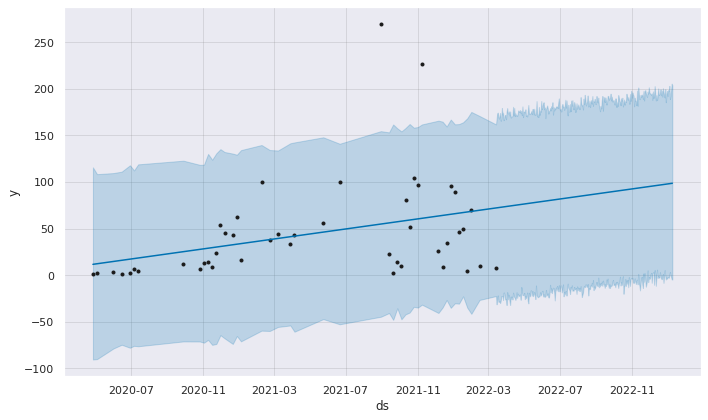

In [101]:
plot1 = m.plot(forecast, uncertainty=True)

<AxesSubplot:title={'center':'Actual vs Forecast for UPC 192340682586'}, xlabel='ds'>

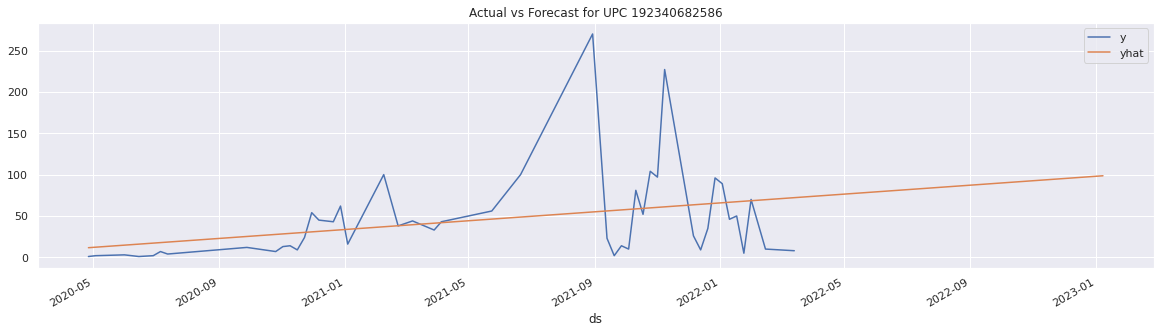

In [102]:
ax = (prophdf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast for UPC 192340682586'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast for UPC 192340682586', ax=ax)

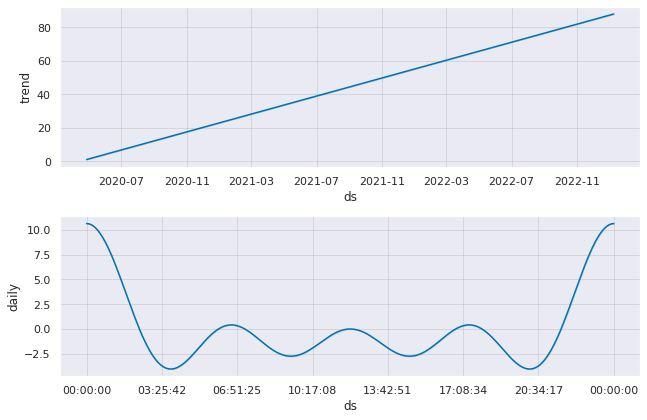

In [103]:
plot2 = m.plot_components(forecast)

In [104]:
from fbprophet.diagnostics import cross_validation

In [105]:
dfcv = cross_validation(m, horizon='270 days', period='100 days', initial='367 days')

  0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
dfcv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
17,2022-01-17,98.911834,64.501961,132.771369,50.0,2021-06-17
18,2022-01-24,100.068563,67.928395,131.671291,5.0,2021-06-17
19,2022-01-31,101.225292,69.570028,132.403974,70.0,2021-06-17
20,2022-02-14,103.538751,69.362023,134.767180,10.0,2021-06-17
21,2022-03-14,108.165669,72.700733,142.333702,8.0,2021-06-17


In [107]:
from fbprophet.diagnostics import  performance_metrics

In [108]:
dfperformance = performance_metrics(dfcv)
dfperformance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,74 days,19501.703102,139.648498,115.006402,0.538622,0.538622,0.0
1,88 days,20378.732111,142.754097,124.656729,1.557296,1.557296,0.0
2,95 days,4501.075797,67.090057,66.169069,20.509482,20.509482,0.0
3,102 days,5188.339384,72.030128,71.825798,21.683436,21.683436,0.0
4,109 days,4765.237052,69.030696,68.982527,5.949622,5.949622,0.0


In [109]:
from fbprophet.plot import plot_cross_validation_metric

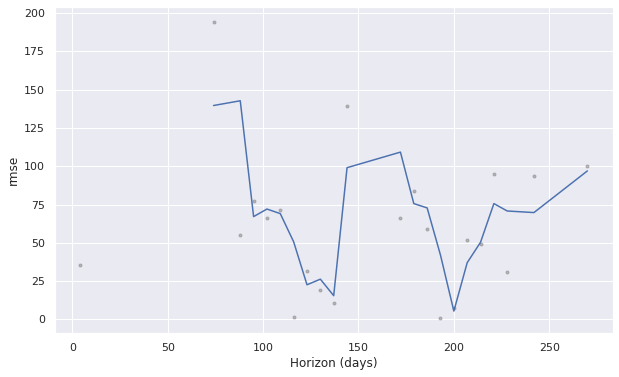

In [110]:
fig = plot_cross_validation_metric(dfcv, metric='rmse')

In [82]:
#forecast.to_csv('forecast.csv')

In [114]:
dfr2 = dfcv[['y','yhat']]

In [116]:
dfr2.head()

,y,yhat
0,100.0,64.209951
1,270.0,75.777245
2,23.0,78.090704
3,2.0,79.247433
4,14.0,80.404163


In [115]:
from sklearn.metrics import r2_score

r2 = r2_score(dfr2.y, dfr2.yhat)
r2

-0.25645041252686296